##

## Customer Churn Prediction

## Life cycle of Machine Learning project 
- Defining Problem statement
- Data Colllection
- data Checks to perform
- EDA
- Data Preprocessing
- Model Tranning
- choosing  the best model

## 1. Problem statement
- Customer retention is a critical challenge in the telecommunications industry. Acquiring new customers often costs significantly more than retaining existing ones. IBM’s Telco Customer Churn dataset provides a detailed view of customer demographics, service usage, account information, and churn behavior. Identifying which customers are likely to churn enables companies to take proactive retention measures, improve customer satisfaction, and reduce revenue loss.

-  we have to Predict customer churn using demographic, service, and account data from a telecom company to enable targeted retention strategies and reduce customer attrition through machine learning classification.


## 2. Data Collection
Dataset Source : https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

### Importing Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
warnings.filterwarnings("ignore")


In [28]:
data=pd.read_csv('data/churn data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3.Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check various categories present in the different categorical column

There is no missing and duplicate vslues in the data

In [29]:
#dropping umwanted columns
data=data.drop(['customerID'], axis=1 )

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [31]:
numerical_features=['tenure','MonthlyCharges','TotalCharges']
for column in data.columns:
    if column not in numerical_features:
         print(column,data[column].unique())
         print('-'*30)

gender ['Female' 'Male']
------------------------------
SeniorCitizen [0 1]
------------------------------
Partner ['Yes' 'No']
------------------------------
Dependents ['No' 'Yes']
------------------------------
PhoneService ['No' 'Yes']
------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
------------------------------
TechSupport ['No' 'Yes' 'No internet service']
------------------------------
StreamingTV ['No' 'Yes' 'No internet service']
------------------------------
StreamingMovies ['No' 'Yes' 'No internet service']
------------------------------
Contract ['Month-to-month' 'One year' 'Two year']
------------------------------
PaperlessBilling

In [32]:
#converting SeniorCitizen and TotalCharges to numbers
data['TotalCharges'] = data['TotalCharges'].str.strip().replace('', np.nan).astype(float)
data['SeniorCitizen'] = data['SeniorCitizen'].astype(int)

In [33]:
#filling the missing values with mean
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())


we replace blank spaces presrnt in the 'TotalCharges' column to 'NaN' and replace those 'NaN' vlaues with the mean of the 'TotalCharges' column 

In [34]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## 3. EDA

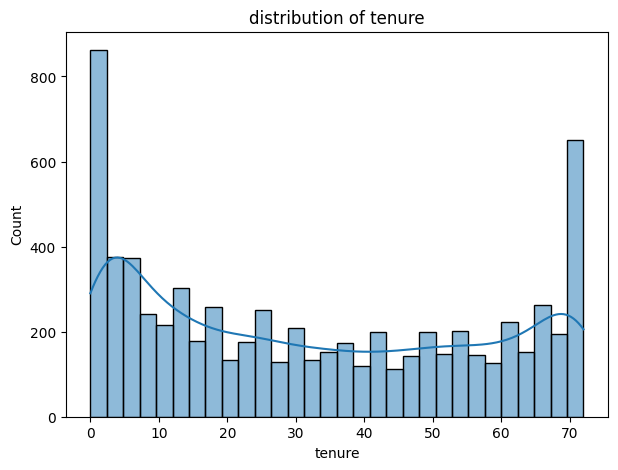

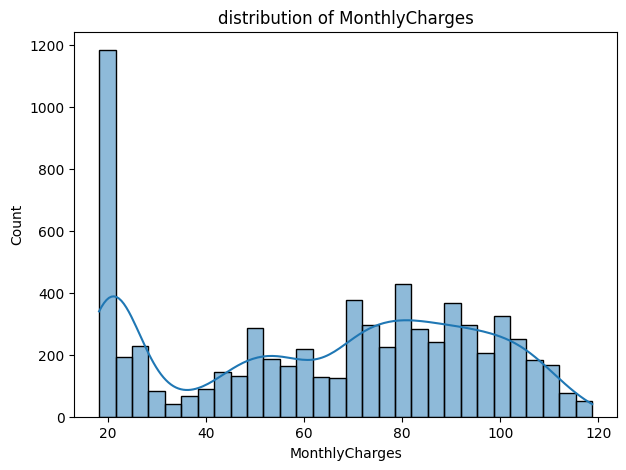

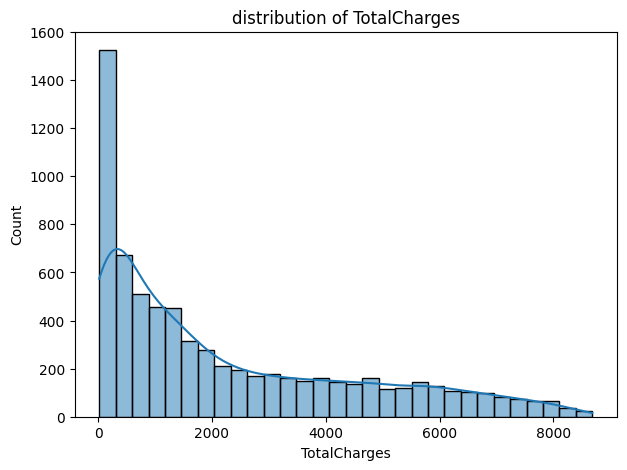

In [35]:
def plot_histogram(data,column):
    plt.figure(figsize=(7, 5))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'distribution of {column}')
    plt.show()
plot_histogram(data, 'tenure')
plot_histogram(data, 'MonthlyCharges')    
plot_histogram(data, 'TotalCharges')

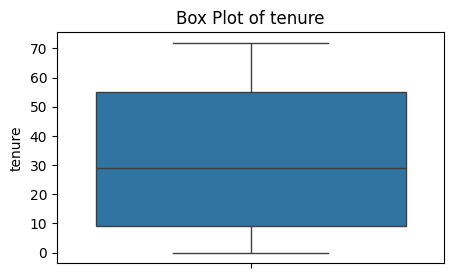

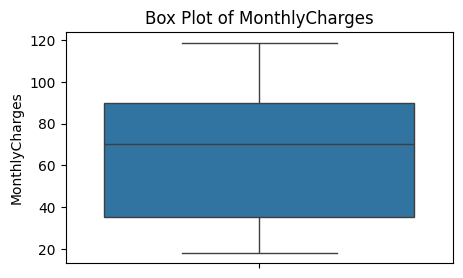

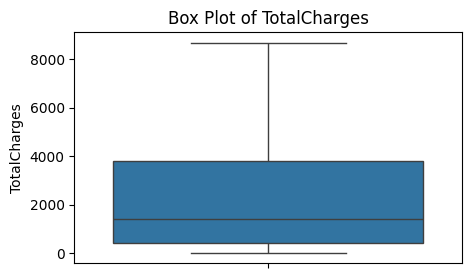

In [36]:
def plot_boxplot(data, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=data[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show()
plot_boxplot(data, 'tenure')
plot_boxplot(data, 'MonthlyCharges')            
plot_boxplot(data, 'TotalCharges')  

**There is no Outlires present in the dataset.**

- To find corelation between numerical column

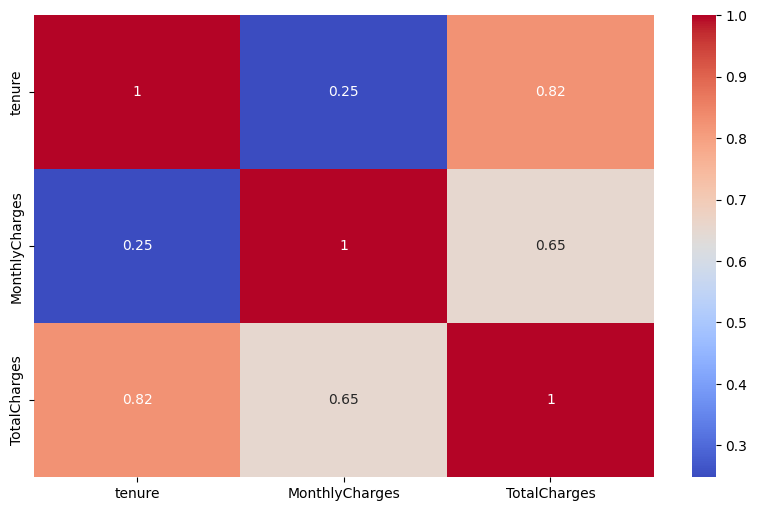

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.show()

- **If two columns are corelated then we drop one column and work with another**

In [38]:
#categorical features
categorical_features =data.select_dtypes(include=['object']).columns.tolist()
categorical_features = ["SeniorCitizen"] + categorical_features
categorical_features


['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Count Plot for categorical coumns


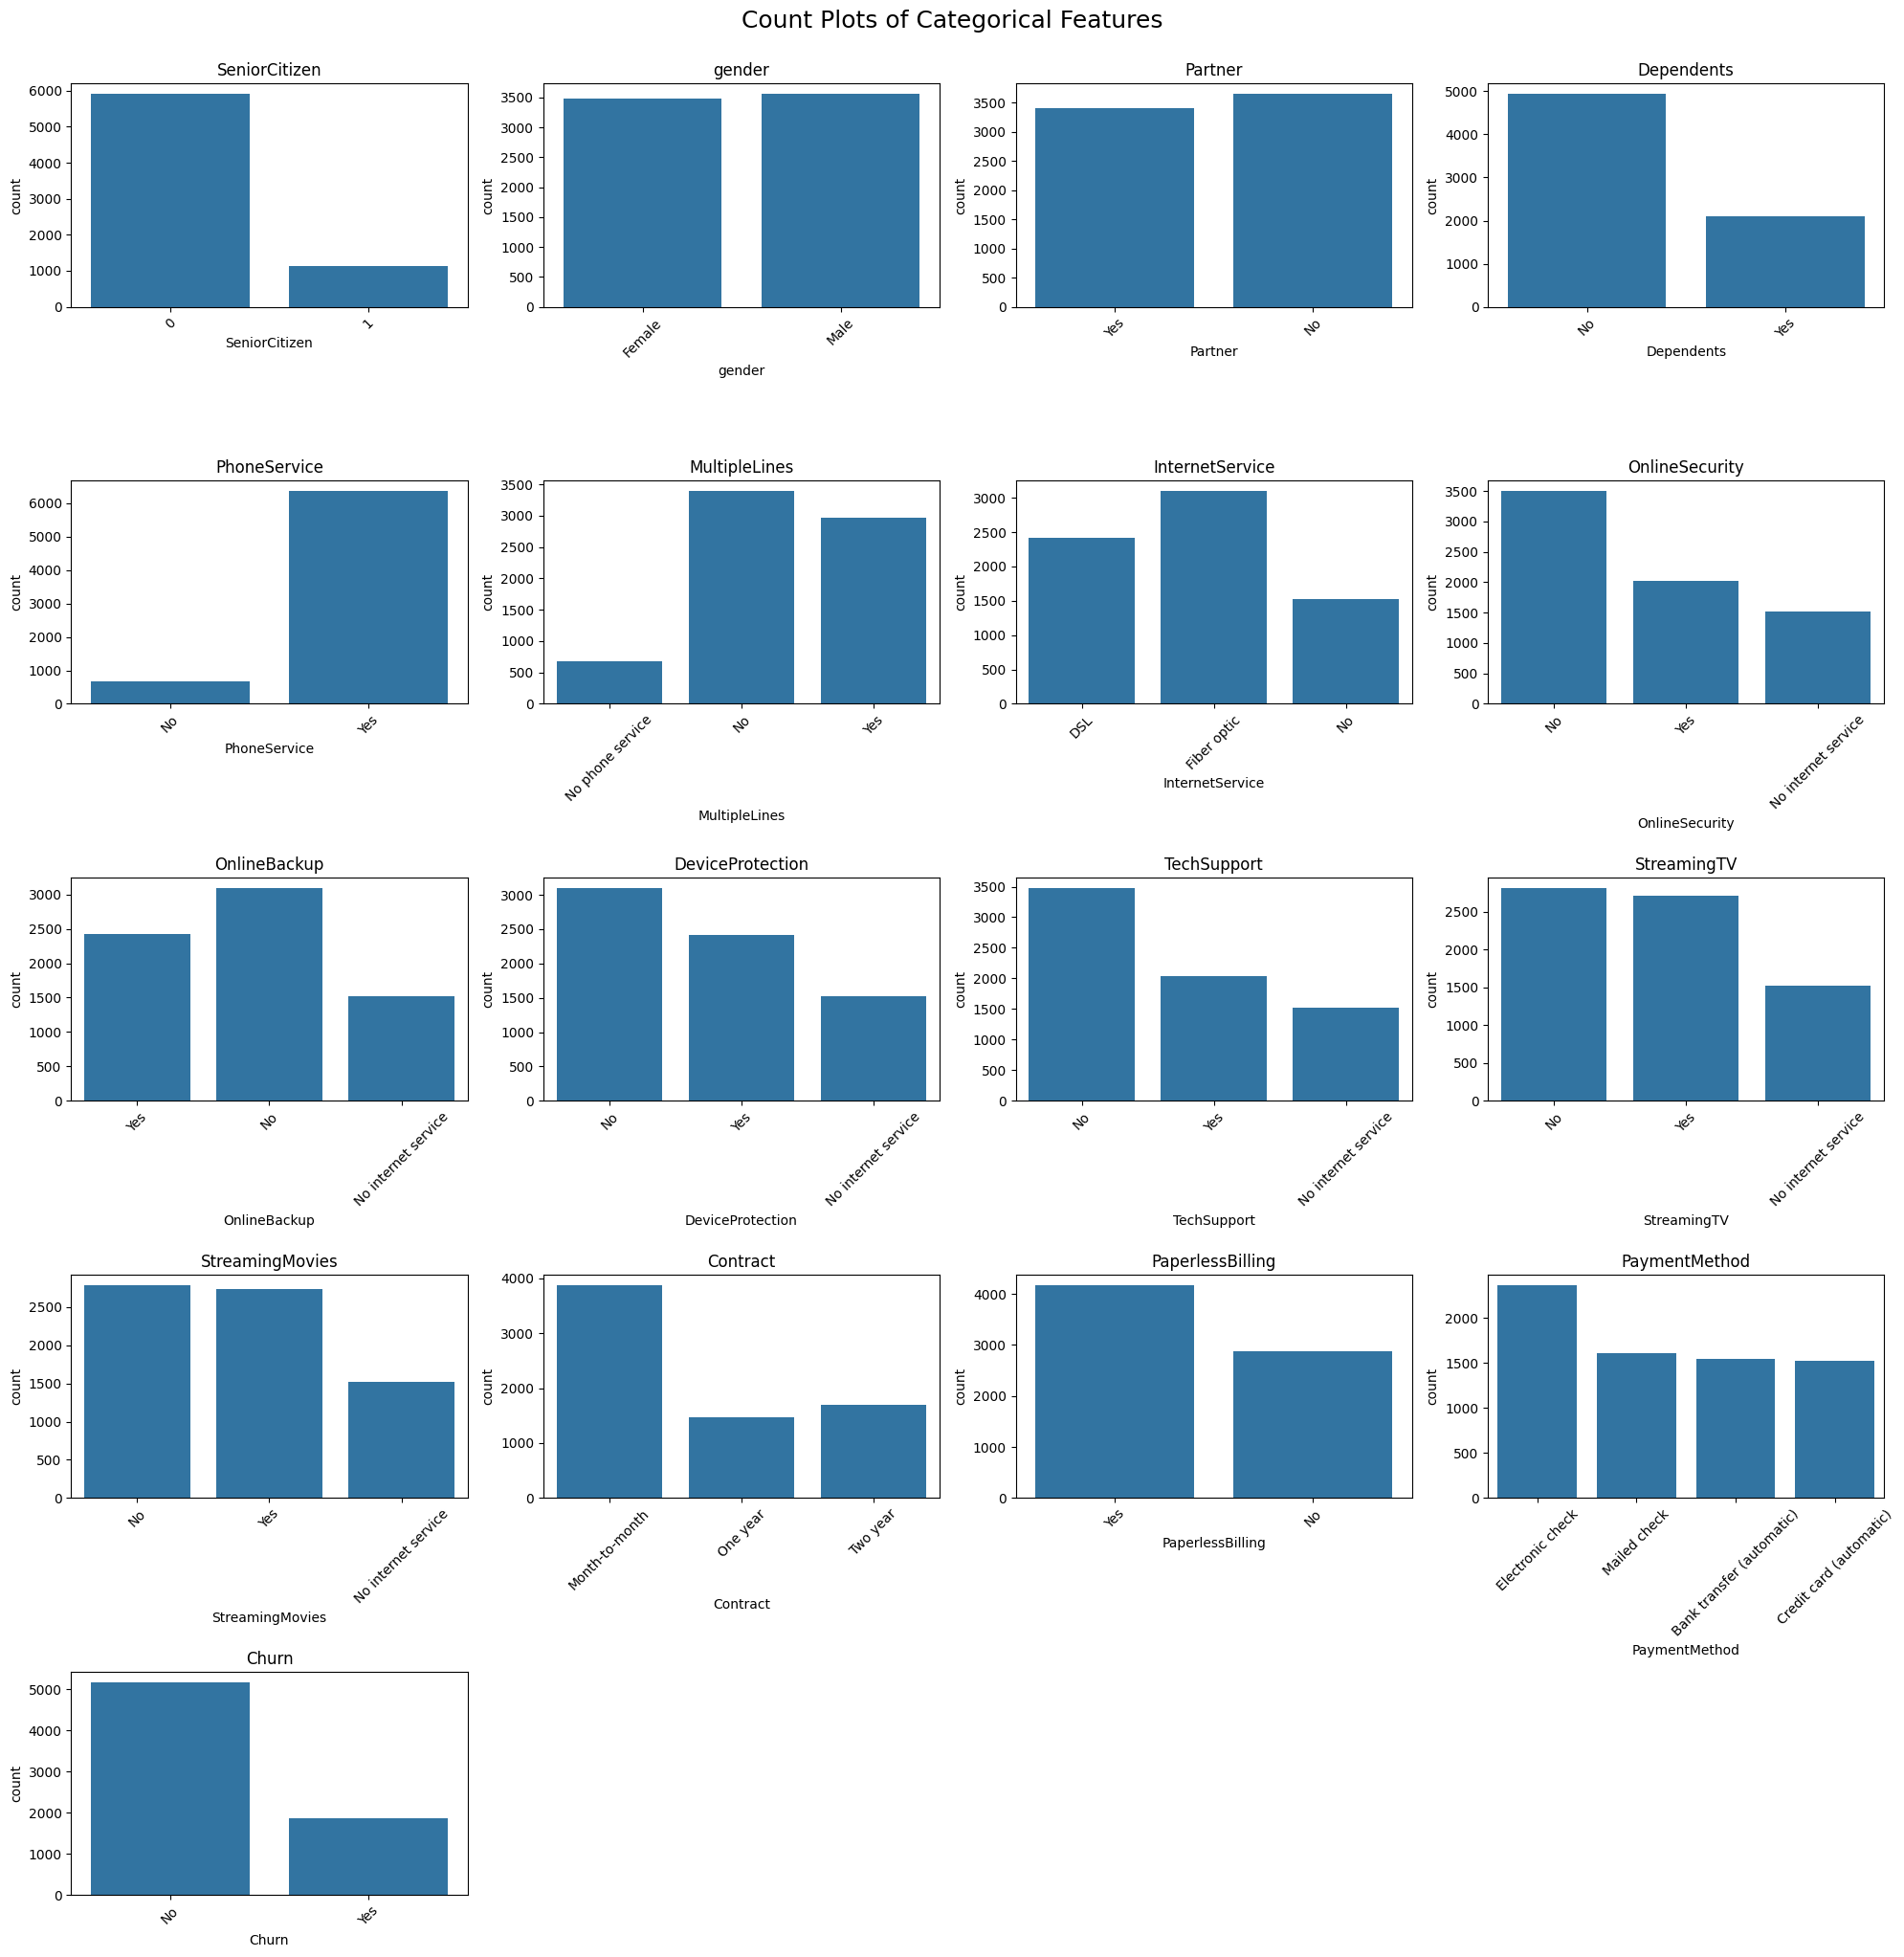

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import math


num_plots = len(categorical_features)
cols = 4
rows = math.ceil(num_plots / cols)

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x=data[col])
    plt.title(f'{col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle("Count Plots of Categorical Features", fontsize=18, y=1.02)
plt.show()
